In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [3]:
m = 100 # Subsample size
sbp_diff = [] # Storage for our subsample mean differences

for i in range(1000):
    dx = da.sample(2*m)  # We need two subsamples of size m
    dx1 = dx.iloc[0:m, :]  # First subsample
    dx2 = dx.iloc[m:, :]  # Second subsample
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())  # The differenc

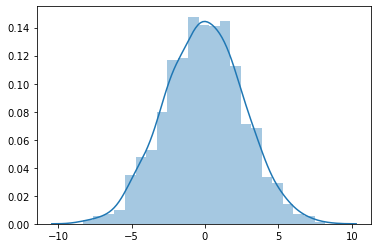

In [4]:
sns.distplot(sbp_diff)

In [5]:
pd.Series(sbp_diff).describe()

count    1000.000000
mean       -0.084164
std         2.653330
min        -8.319101
25%        -1.905567
50%        -0.098915
75%         1.688035
max         8.177754
dtype: float64

count    1000.000000
mean        0.007250
std         1.343239
min        -4.947872
25%        -0.846775
50%         0.029387
75%         0.901243
max         4.144772
dtype: float64

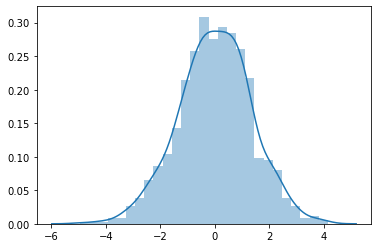

In [6]:
m = 400  # Change the sample size, everything else below is unchanged from the cells above
sbp_diff = []

for i in range(1000):
    dx = da.sample(2*m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())
    
sns.distplot(sbp_diff)
pd.Series(sbp_diff).describe()

In [7]:
for m in 100, 400:  # m is the subsample size
    sbp_diff = [] # calculate correlation coefficients from independent samples of size m
    for i in range(1000):
        dx = da.sample(2*m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        r1 = np.corrcoef(dx1.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        r2 = np.corrcoef(dx2.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        sbp_diff.append(r1 - r2)
    print("m=%d" % m, np.std(sbp_diff), np.sqrt(2 / m))    

m=100 0.12278201625549112 0.1414213562373095
m=400 0.06390213766971115 0.07071067811865475


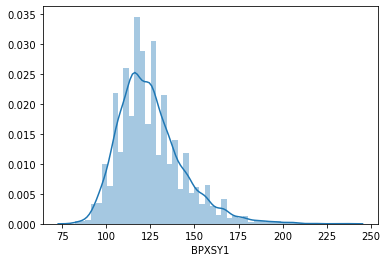

In [8]:
sns.distplot(da.BPXSY1.dropna())

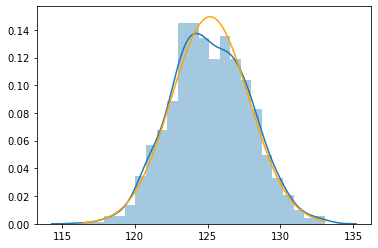

In [9]:
m = 50
sbp_mean = []
for i in range(1000):
    dx = da.sample(m)
    sbp_mean.append(dx.BPXSY1.dropna().mean())
sns.distplot(sbp_mean)

# The lines below plot the density of a normal approximation to the data generated above
x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100)
from scipy.stats.distributions import norm
v = dx.BPXSY1.dropna()
y = norm.pdf(x, np.mean(sbp_mean), np.std(sbp_mean))
plt.plot(x, y, color='orange')